# **Appendix 2 - Explanatory data analysis (EDA)**

In [2]:
# Import libraries
import matplotlib.pyplot as plt
import os
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
from IPython.display import display, Image
from matplotlib.ticker import StrMethodFormatter, FixedLocator
from scipy import stats
from scipy.stats import pointbiserialr

In [3]:
# Read data
df = pd.read_csv('../data/Stage_2.csv')
display(df.head())

,aspect_binary,caution,country,crevasse,ele,fd,fd_maxv,fd_risk,fold,foot,forest,glacier,id,lake,planc7,ski,slope,snowshoe,street_binary,ti
0,1,0,1.0,1.0,2716.810303,0.0,3.048835,16.798878,1.934570,0,0.0,1,1,0,-5.901372,1,5.509934,0,0,0.032264
1,0,0,1.0,1.0,2715.599609,0.0,2.629116,20.255973,8.401803,0,0.0,1,11,0,-34.699268,1,7.704482,0,0,0.133462
2,1,0,1.0,0.0,2105.599365,0.0,25.022329,585.281240,-2.120281,0,0.0,0,21,0,1.554070,1,23.390358,0,0,0.447222
3,1,0,1.0,0.0,2159.591553,0.0,32.403648,984.716817,23.638254,0,0.0,0,31,0,-22.434343,1,30.389072,0,0,0.161444
4,1,0,1.0,0.0,2212.433838,0.0,34.518562,958.231479,11.325026,0,0.0,0,41,0,-3.689256,1,27.759890,0,0,0.068987


In [3]:
# Determine variable types
variables_binary = ['aspect_binary', 'caution', 'foot', 'forest', 'glacier', 'street_binary']
variables_categorical = ['crevasse']
variables_continuous = ['ele', 'fd', 'fd_maxv', 'fd_risk', 'fold', 'planc7', 'slope', 'ti']

# <span style="color:#FF9999">**1 Visual analysis**</span>

## **1.0 Variable 'fd_risk'**

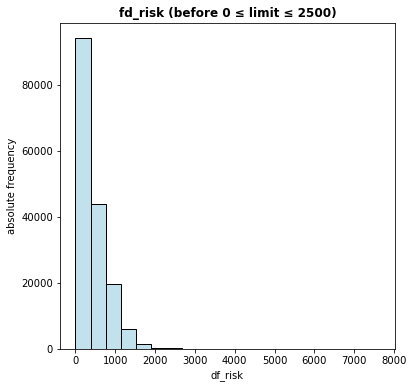

0.0
7637.930473866781
Number of values above 2500: 204


In [4]:
# Plot frequency diagram for the variable 'fd_risk'
plt.figure(figsize=(6, 6))
sns.histplot(df['fd_risk'], kde=False, color='#ADD8E6', bins=20)
plt.title('fd_risk (before 0 ≤ limit ≤ 2500)', fontweight='bold')
plt.xlabel('df_risk')
plt.ylabel('absolute frequency')
plt.savefig('../plots/fd_risk_before.png')
plt.show()

count_above_2500 = (df['fd_risk'] > 2500).sum()
print(df['fd_risk'].min())
print(df['fd_risk'].max())
print('Number of values above 2500:', count_above_2500)

In [5]:
# Replace values below -300 with -300 and values above 2500 with 2500 (limitation of extreme values)
df['fd_risk'] = df['fd_risk'].clip(lower=0, upper=2500)

# Check new Min and Max values (Min should be 0, max should be 2500)
print(df['fd_risk'].min())
print(df['fd_risk'].max())

0.0
2500.0


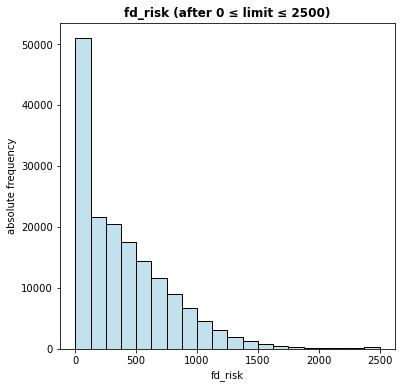

In [6]:
# Plot again after limitation to -350/350
plt.figure(figsize=(6, 6))
sns.histplot(df['fd_risk'], kde=False, color='#ADD8E6', bins=20)
plt.title('fd_risk (after 0 ≤ limit ≤ 2500)', fontweight='bold')
plt.xlabel('fd_risk')
plt.ylabel('absolute frequency')
plt.savefig('../plots/fd_risk_after.png')
plt.show()

## **1.1 Variable 'planc7'**

- The variable 'planc7' has very few values that are below -350 or above -350. 
- These outliers are recognisable in the first figure. The x-axis is scaled from -10'000 to 4'000 because of the few outliers.
- The values outside the interval (-350, 350) are therefore limited to the values -350 respectively 350. The new shape of the distribution can be recognised in the second figure.

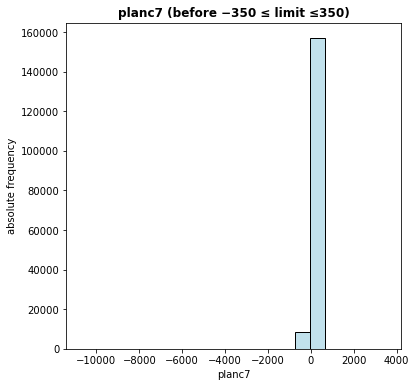

-10691.1533203125
3507.78100585938
Number of values above 350: 74
Number of values below 350: 251


In [7]:
# Plot frequency diagram for the variable 'planc7'
plt.figure(figsize=(6, 6))
sns.histplot(df['planc7'], kde=False, color='#ADD8E6', bins=20)
plt.title('planc7 (before −350 ≤ limit ≤350)', fontweight='bold')
plt.xlabel('planc7')
plt.ylabel('absolute frequency')
plt.savefig('../plots/planc7_before.png')
plt.show()

count_above_350 = (df['planc7'] > 350).sum()
count_below_350 = (df['planc7'] < -350).sum()
print(df['planc7'].min())
print(df['planc7'].max())
print('Number of values above 350:', count_above_350)
print('Number of values below 350:', count_below_350)

In [8]:
# Replace values below -300 with -300 and values above 300 with 300 (limitation of extreme values)
df['planc7'] = df['planc7'].clip(lower=-350, upper=350)

# Check new Min and Max values (Min should be -350, max should be 350)
print(df['planc7'].min())
print(df['planc7'].max())

-350.0
350.0


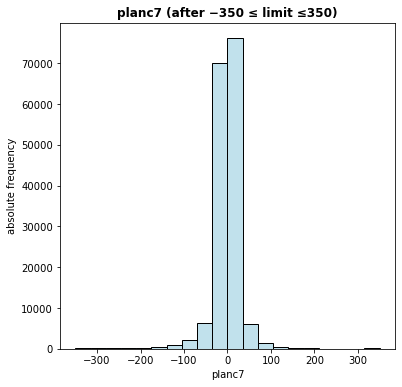

In [9]:
# Plot again after limitation to -350/350
plt.figure(figsize=(6, 6))
sns.histplot(df['planc7'], kde=False, color='#ADD8E6', bins=20)
plt.title('planc7 (after −350 ≤ limit ≤350)', fontweight='bold')
plt.xlabel('planc7')
plt.ylabel('absolute frequency')
plt.savefig('../plots/planc7_after.png')
plt.show()

## **1.2 Continuous variables**

Saved images:


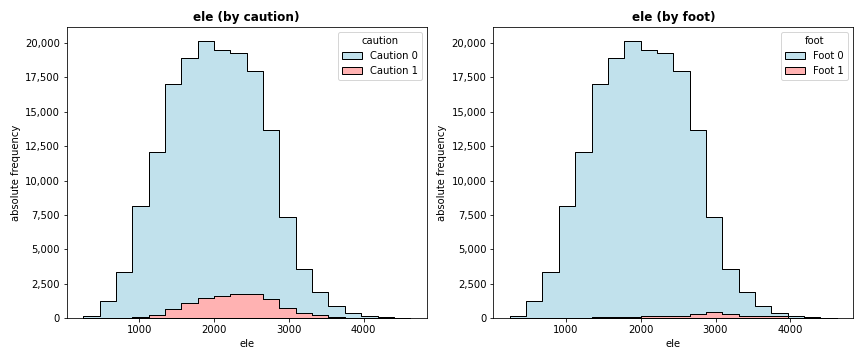

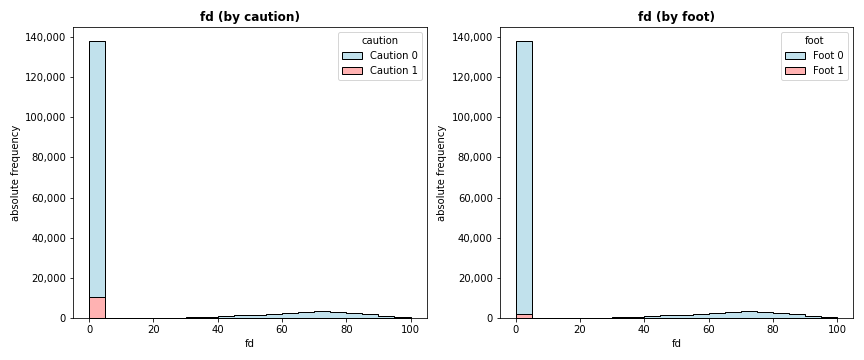

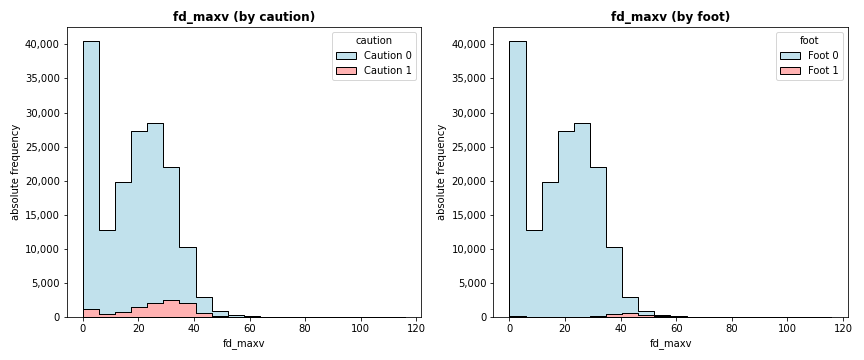

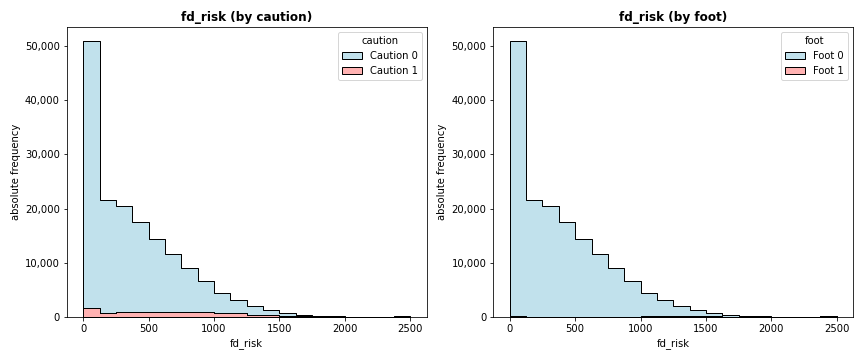

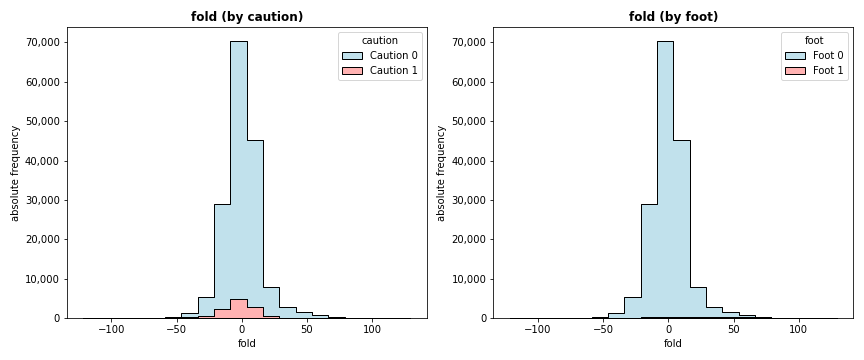

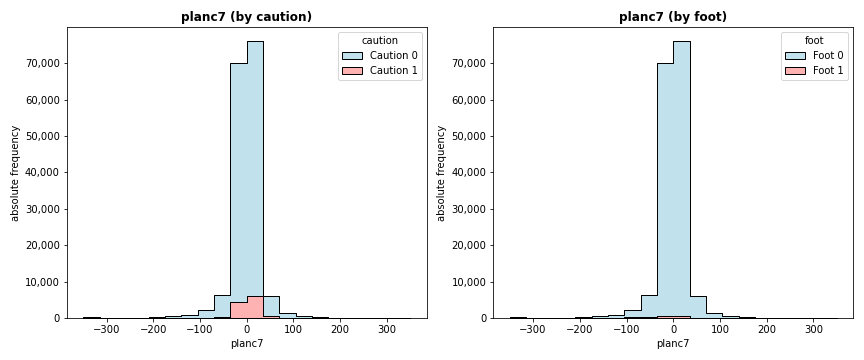

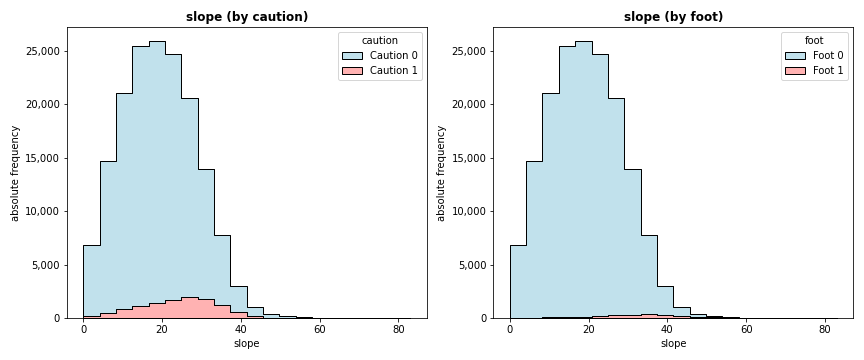

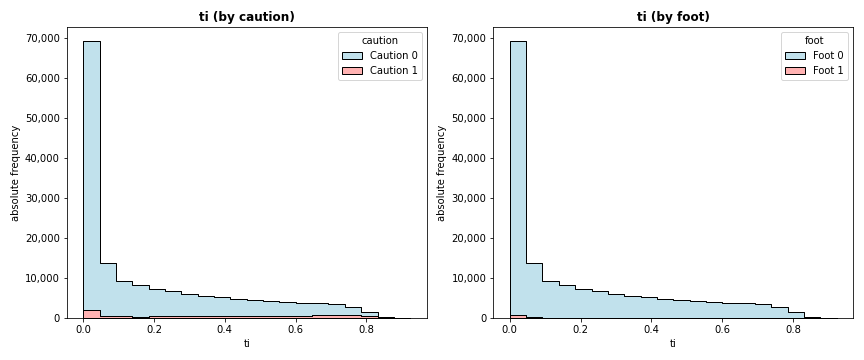

In [10]:
# Create a list of dictionaries for conditions and corresponding labels
conditions = [{'column': 'caution', 'labels': ['Caution 0', 'Caution 1'], 'color_palette': ['#ADD8E6', '#FF9999']},
              {'column': 'foot', 'labels': ['Foot 0', 'Foot 1'], 'color_palette': ['#ADD8E6', '#FF9999']}]

# Create a list to store the filenames of the saved images
saved_images = []

# Iterate over continuous variables
for var_idx, variable in enumerate(variables_continuous):
    # Create a new figure for each 2x1 grid
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Iterate over the conditions list
    for idx, condition in enumerate(conditions):
        # Separate data based on the condition values
        condition_0 = df[df[condition['column']] == 0].copy()
        condition_1 = df[df[condition['column']] == 1].copy()
        condition_0.loc[:, condition['column']] = condition['labels'][0]
        condition_1.loc[:, condition['column']] = condition['labels'][1]

        # Concatenate dataframes with the labels
        combined_data = pd.concat([condition_0, condition_1])

        # Calculate bin width for histogram
        min_value = combined_data[variable].min()
        max_value = combined_data[variable].max()
        num_bins = 20
        bin_width = (max_value - min_value) / num_bins
        bin_edges = [min_value + i * bin_width for i in range(num_bins + 1)]

        # Plot histplot with KDE for the condition 0 and condition 1 stacked
        sns.histplot(data=combined_data, x=variable, kde=False, bins=bin_edges, 
                     hue=condition['column'], element='step', palette=condition['color_palette'], legend=True, multiple='stack',
                     ax=axes[idx])  # Assign subplot axes

        # Set subplot title
        axes[idx].set_title(f"{variable} (by {condition['column']})", fontweight='bold')
        axes[idx].yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
        axes[idx].set_ylabel('absolute frequency')

    # Adjust layout
    plt.tight_layout()

    # Save the current 2x1 grid as PNG
    filename = f'../plots/visual_continuous_{var_idx}.png'
    plt.savefig(filename)
    plt.close(fig)  # Close the current figure
    
    # Append the filename to the list of saved images
    saved_images.append(filename)

# Display the saved images
print("Saved images:")
for image_file in saved_images:
    display(Image(filename=image_file))

## **1.3 Binary variables**

**Binary varibles - targets**
- The following figure shows the distribution of the binary target variables 'caution' and 'foot'. It can be deduced from this that the two variables are very imbalanced. The classes 'caution' = 1 and
'foot' = 1 (red in figure x) are therefore strongly underrepresented in the data. 
- The case 'foot' = 1 is rarer than the case 'caution' = 1. Imbalanced data in machine learning may lead to poor performance, because the distribution of classes is not equal, meaning one class significantly outnumbers the other.
- In the modelling part, the problem of imbalanced data is addressed with appropriate techniques such as oversampling or undersampling.


**Binary variables - features**
- If the transformed variable 'aspect_binary' is considered, it can be seen that on a relative scale, the increased caution values occur more frequently for the aspects north-west, north and north-east, i.e. 'aspect_binary' = 1.
- Two graphical conclusions can be drawn with regard to the binary variable 'forest': The fact from the interview that forest can be increased caution (due to dangers such as fatigue or loss of orientation) does not seem to be reflected in the data. Additionally, forests seem to reduce the danger in the data, as the terrain can become safer due to a lower avalanche risk according to the literature.
- With the binary variable 'street', it is immediately recognisable that values with 'street' = 1 are practically never a foot section. An increased caution section also seems to occur very rarely on a street. This is also in line with the information from the interview where Andy Eisenhut pointed out that the sections on roads are practically never 'caution' or 'foot'.

Saved images:


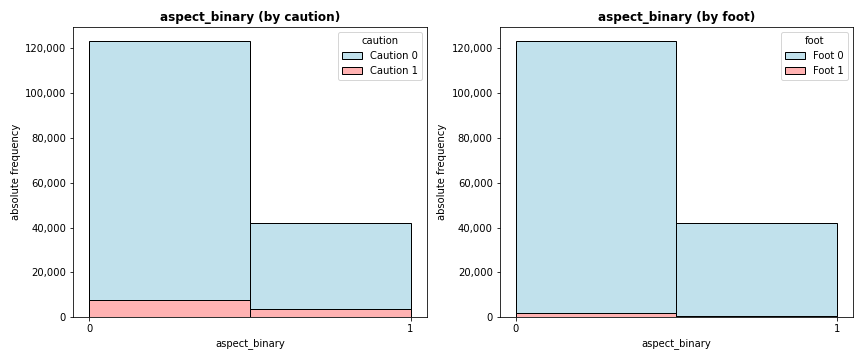

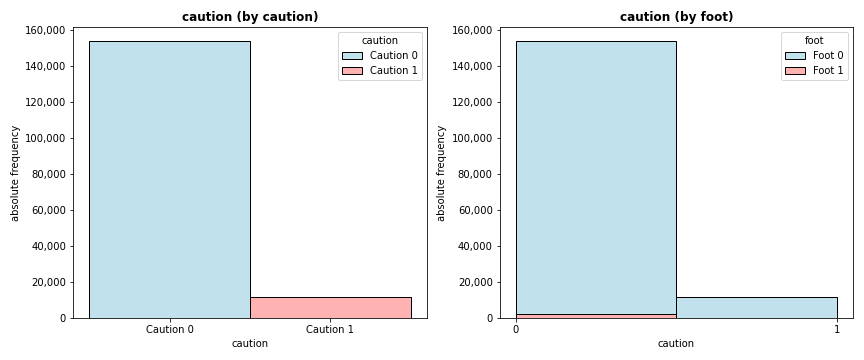

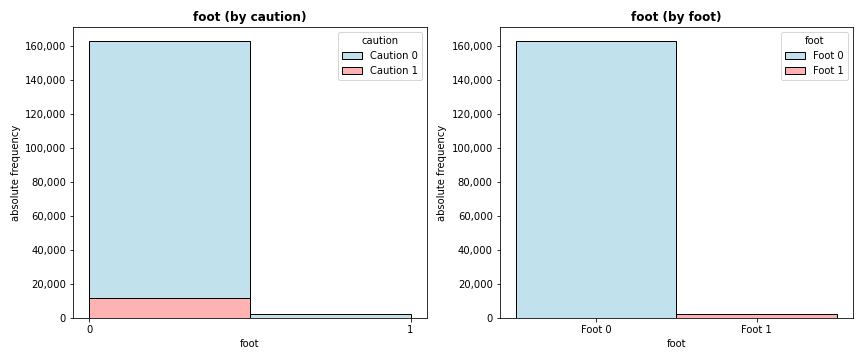

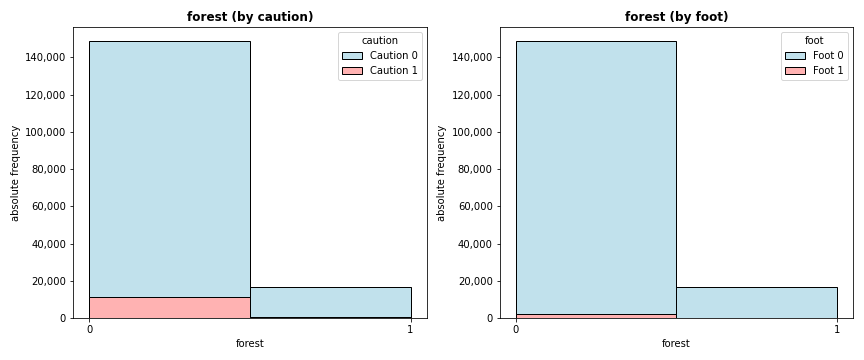

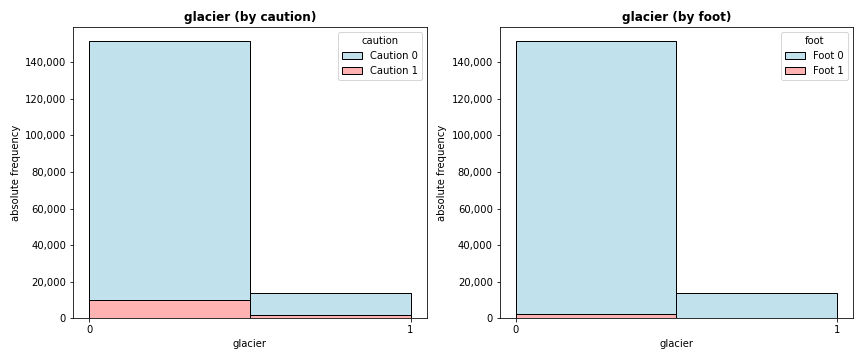

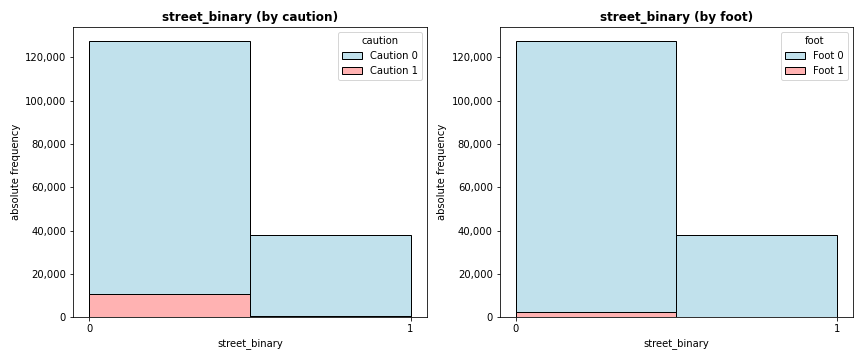

In [11]:
# Create a list to store the filenames of the saved images
saved_images = []

# Iterate over binary variables
for var_idx, variable in enumerate(variables_binary):
    # Create a new figure for each 2x1 grid
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Iterate over the conditions list
    for idx, condition in enumerate(conditions):
        # Separate data based on the condition values
        condition_0 = df[df[condition['column']] == 0].copy()
        condition_1 = df[df[condition['column']] == 1].copy()
        condition_0.loc[:, condition['column']] = condition['labels'][0]
        condition_1.loc[:, condition['column']] = condition['labels'][1]

        # Concatenate dataframes with the labels
        combined_data = pd.concat([condition_0, condition_1])

        # Plot histplot with bars for the condition 0 and condition 1 stacked
        sns.histplot(data=combined_data, x=variable, kde=False, bins=2, 
                     hue=condition['column'], element='bars', palette=condition['color_palette'], legend=True, multiple='stack',
                     ax=axes[idx])

        # Set x-axis tick labels
        axes[idx].set_xticks([0, 1])

        # Set subplot title
        axes[idx].set_title(f"{variable} (by {condition['column']})", fontweight='bold')
        axes[idx].yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
        axes[idx].set_ylabel('absolute frequency')

    # Adjust layout
    plt.tight_layout()

    # Save the current 2x1 grid as PNG
    filename = f'../plots/visual_binary_{var_idx}.png'
    plt.savefig(filename)
    plt.close(fig)  # Close the current figure
    
    # Append the filename to the list of saved images
    saved_images.append(filename)

# Display the saved images
print("Saved images:")
for image_file in saved_images:
    display(Image(filename=image_file))

## **1.4 Categorical variables**

- As the categorical variable 'street' has been recoded into a binary variable, there is now only one remaining categorical variable in the data set. 
- Therefore, the variable 'crevasse' indicates how crevasse-like the terrain is. A value of 'crevasse' = 0 corresponds to no crevasse zone, while a value of 7 corresponds to a very typical crevasse zone. The following graphs were plotted twice: Once for all data points and once only with a filter if the point is located on a glacier, i.e. excluding all values 'crevasse'.
- The first figure shows that most of the route points are not located on a glacier, i.e. 'crevasse'. 
- However, if only the subset with the glaciers is considered, i.e. 'crevasse' ≠ 0, then it can be seen, particularly in the breakdown by 'caution' that the relative proportion of 'caution' increases with a higher 'crevasse' value, as shown in the second figure. This is hardly recognisable for the variable 'foot'.


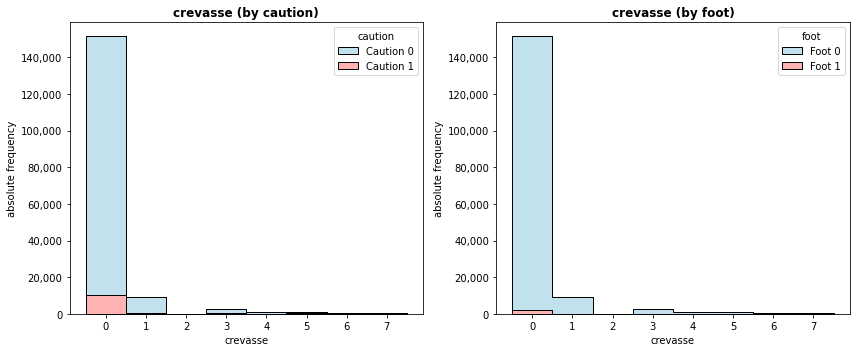

In [12]:
# Determine the number of rows in the subplot grid based on the number of variables
num_rows = len(variables_categorical)
num_cols = 2

# Create the subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 5*num_rows))

# Ensure axes is a 2D array even if there's only one row
if num_rows == 1:
    axes = axes.reshape(1, -1)

# Iterate over categorical variables
for var_idx, variable in enumerate(variables_categorical):
    # Iterate over the conditions list
    for idx, condition in enumerate(conditions):
        # Separate data based on the condition values
        condition_0 = df[df[condition['column']] == 0].copy()
        condition_1 = df[df[condition['column']] == 1].copy()
        condition_0.loc[:, condition['column']] = condition['labels'][0]
        condition_1.loc[:, condition['column']] = condition['labels'][1]

        # Concatenate dataframes with the labels
        combined_data = pd.concat([condition_0, condition_1])

        # Calculate bin width for histogram
        min_value = 0
        max_value = 7  # Update max value to match the range of categorical values
        num_bins = 8    # Update number of bins to match the number of unique categorical values
        bin_edges = [i for i in range(num_bins + 1)]  # Bin edges are the unique categorical values

        # Plot histplot with KDE for the condition 0 and condition 1 stacked
        sns.histplot(data=combined_data, x=variable, kde=False, bins=bin_edges, 
                     hue=condition['column'], element='step', palette=condition['color_palette'], legend=True, multiple='stack',
                     ax=axes[var_idx, idx])

        # Set x-axis ticks in the middle of each bar
        bar_width = 1.0  # Assuming each bar has a width of 1
        axes[var_idx, idx].xaxis.set_major_locator(FixedLocator([edge + bar_width/2 for edge in bin_edges[:-1]]))
        axes[var_idx, idx].set_xticklabels([str(int(value)) for value in bin_edges[:-1]])  # Adjusted number of tick labels

        # Set subplot title
        axes[var_idx, idx].set_title(f"{variable} (by {condition['column']})", fontweight='bold')
        axes[var_idx, idx].yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
        axes[var_idx, idx].set_ylabel('absolute frequency')

# Adjust layout
plt.tight_layout()

# Show plot
plt.savefig('../plots/visual_categorical.png')
plt.show()

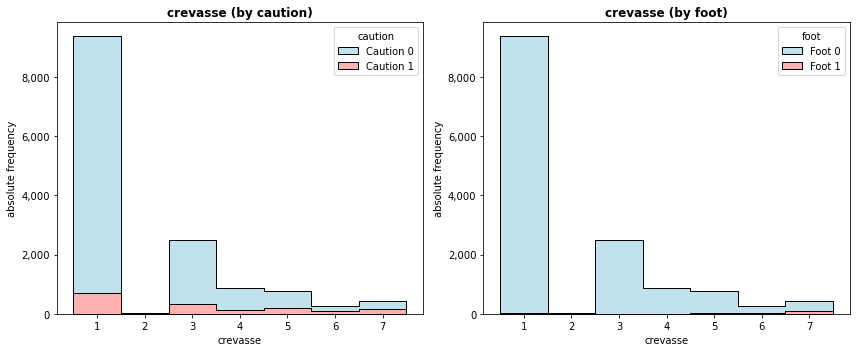

In [13]:
# Determine the number of rows in the subplot grid based on the number of variables
num_rows = len(variables_categorical)
num_cols = 2

# Create the subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 5*num_rows))

# Ensure axes is a 2D array even if there's only one row
if num_rows == 1:
    axes = axes.reshape(1, -1)

# Iterate over categorical variables
for var_idx, variable in enumerate(variables_categorical):
    # Iterate over the conditions list
    for idx, condition in enumerate(conditions):
        # Separate data based on the condition values
        condition_0 = df[df[condition['column']] == 0].copy()
        condition_1 = df[df[condition['column']] == 1].copy()
        condition_0.loc[:, condition['column']] = condition['labels'][0]
        condition_1.loc[:, condition['column']] = condition['labels'][1]

        # Concatenate dataframes with the labels
        combined_data = pd.concat([condition_0, condition_1])

        # Calculate bin width for histogram
        min_value = 1  # Start from 1 instead of 0
        max_value = 8  # Update max value to match the range of categorical values
        num_bins = 8    # Update number of bins to match the number of unique categorical values excluding 0
        bin_edges = [i for i in range(min_value, num_bins + 1)]  # Bin edges start from 1

        # Plot histplot with KDE for the condition 0 and condition 1 stacked
        sns.histplot(data=combined_data, x=variable, kde=False, bins=bin_edges, 
                     hue=condition['column'], element='step', palette=condition['color_palette'], legend=True, multiple='stack',
                     ax=axes[var_idx, idx])

        # Set x-axis ticks in the middle of each bar
        bar_width = 1.0  # Assuming each bar has a width of 1
        axes[var_idx, idx].xaxis.set_major_locator(FixedLocator([edge + bar_width/2 for edge in bin_edges[:-1]]))
        axes[var_idx, idx].set_xticklabels([str(int(value)) for value in bin_edges[:-1]])  # Adjusted number of tick labels

        # Set subplot title
        axes[var_idx, idx].set_title(f"{variable} (by {condition['column']})", fontweight='bold')
        axes[var_idx, idx].yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
        axes[var_idx, idx].set_ylabel('absolute frequency')

# Adjust layout
plt.tight_layout()

# Show plot
plt.savefig('../plots/visual_categorical_sub.png')
plt.show()

# <span style="color:#FF9999">**2 Summary statistics**</span>

## 2.1 **Summary statistics for binary variables**

### Categorized by 'caution'

In [14]:
summary_stats = {}
for var in variables_binary:
    count = df[var].count()
    ones = df[var].sum()
    zeros = count - ones
    caution_ones = df.loc[df[var] == 1, 'caution'].sum()
    caution_zeros = df.loc[df[var] == 0, 'caution'].sum()
    proportion_ones = ones / count
    proportion_zeros = zeros / count
    proportion_caution_ones = caution_ones / ones if ones != 0 else 0
    proportion_caution_zeros = caution_zeros / zeros if zeros != 0 else 0
    proportion_caution_ones_true = caution_ones / ones if ones != 0 else 0
    proportion_caution_zeros_true = caution_zeros / zeros if zeros != 0 else 0
    summary_stats[var] = {
        'Total Count': count,
        'True (1)': ones,
        'False (0)': zeros,
        'Caution (1) when True (1)': caution_ones,
        'Caution (1) % when True (1)': proportion_caution_ones_true,
        'Caution (0) when True (1)': ones - caution_ones,
        'Caution (0) % when True (1)': 1 - proportion_caution_ones_true,
        'Caution (1) when False (0)': caution_zeros,
        'Caution (1) % when False (0)': proportion_caution_zeros,
        'Caution (0) when False (0)': zeros - caution_zeros,
        'Caution (0) % when False (0)': 1 - proportion_caution_zeros,
    }


# Create the DataFrame from the summary_stats dictionary
summary_df = pd.DataFrame(summary_stats).T

# Define formatting dictionary
format_dict = {
    'Caution (1) % when False (0)': '{:.2%}'.format,
    'Caution (0) % when False (0)': '{:.2%}'.format,
    'Caution (1) % when True (1)': '{:.2%}'.format,
    'Caution (0) % when True (1)': '{:.2%}'.format
}

# Apply formatting for other variables
for var in summary_df.columns:
    if var not in format_dict:
        format_dict[var] = '{:.0f}'.format

# Display the DataFrame with formatted style
styled_summary_df = summary_df.style.format(format_dict)

# Change color of the header and font color to white
styled_summary_df.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#ADD8E6'), ('color', 'white')]}
])

# Display the styled DataFrame
display(styled_summary_df)

,Total Count,True (1),False (0),Caution (1) when True (1),Caution (1) % when True (1),Caution (0) when True (1),Caution (0) % when True (1),Caution (1) when False (0),Caution (1) % when False (0),Caution (0) when False (0),Caution (0) % when False (0)
aspect_binary,165672,42266,123406,3782,8.95%,38484,91.05%,7854,6.36%,115552,93.64%
caution,165672,11636,154036,11636,100.00%,0,0.00%,0,0.00%,154036,100.00%
foot,165672,2447,163225,0,0.00%,2447,100.00%,11636,7.13%,151589,92.87%
forest,165672,16640,149032,506,3.04%,16134,96.96%,11130,7.47%,137902,92.53%
glacier,165672,13878,151794,1523,10.97%,12355,89.03%,10113,6.66%,141681,93.34%
street_binary,165672,37992,127680,695,1.83%,37297,98.17%,10941,8.57%,116739,91.43%


### Categorized by 'foot'

In [15]:
summary_stats = {}
for var in variables_binary:
    count = df[var].count()
    ones = df[var].sum()
    zeros = count - ones
    foot_ones = df.loc[df[var] == 1, 'foot'].sum()
    foot_zeros = df.loc[df[var] == 0, 'foot'].sum()
    proportion_ones = ones / count
    proportion_zeros = zeros / count
    proportion_foot_ones = foot_ones / ones if ones != 0 else 0
    proportion_foot_zeros = foot_zeros / zeros if zeros != 0 else 0
    proportion_foot_ones_true = foot_ones / ones if ones != 0 else 0
    proportion_foot_zeros_true = foot_zeros / zeros if zeros != 0 else 0
    summary_stats[var] = {
        'Total Count': count,
        'True (1)': ones,
        'False (0)': zeros,
        'Foot (1) when True (1)': foot_ones,
        'Foot (1) % when True (1)': proportion_foot_ones_true,
        'Foot (0) when True (1)': ones - foot_ones,
        'Foot (0) % when True (1)': 1 - proportion_foot_ones_true,
        'Foot (1) when False (0)': foot_zeros,
        'Foot (1) % when False (0)': proportion_foot_zeros,
        'Foot (0) when False (0)': zeros - foot_zeros,
        'Foot (0) % when False (0)': 1 - proportion_foot_zeros,
    }


# Create the DataFrame from the summary_stats dictionary
summary_df = pd.DataFrame(summary_stats).T

# Define formatting dictionary
format_dict = {
    'Foot (1) % when False (0)': '{:.2%}'.format,
    'Foot (0) % when False (0)': '{:.2%}'.format,
    'Foot (1) % when True (1)': '{:.2%}'.format,
    'Foot (0) % when True (1)': '{:.2%}'.format
}

# Apply formatting for other variables
for var in summary_df.columns:
    if var not in format_dict:
        format_dict[var] = '{:.0f}'.format

# Display the DataFrame with formatted style
styled_summary_df = summary_df.style.format(format_dict)

# Change color of the header and font color to white
styled_summary_df.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#ADD8E6'), ('color', 'white')]}
])

# Display the styled DataFrame
display(styled_summary_df)

,Total Count,True (1),False (0),Foot (1) when True (1),Foot (1) % when True (1),Foot (0) when True (1),Foot (0) % when True (1),Foot (1) when False (0),Foot (1) % when False (0),Foot (0) when False (0),Foot (0) % when False (0)
aspect_binary,165672,42266,123406,494,1.17%,41772,98.83%,1953,1.58%,121453,98.42%
caution,165672,11636,154036,0,0.00%,11636,100.00%,2447,1.59%,151589,98.41%
foot,165672,2447,163225,2447,100.00%,0,0.00%,0,0.00%,163225,100.00%
forest,165672,16640,149032,169,1.02%,16471,98.98%,2278,1.53%,146754,98.47%
glacier,165672,13878,151794,301,2.17%,13577,97.83%,2146,1.41%,149648,98.59%
street_binary,165672,37992,127680,100,0.26%,37892,99.74%,2347,1.84%,125333,98.16%


## **2.2 Summary statistics for continuous variables**

### Categorized by 'caution'

In [16]:
# Define the format dictionary for continuous variables
continuous_format_dict = {col: '{:.2f}' for col in variables_continuous}

# Assuming 'caution' is a column in your DataFrame
caution_1_summary = df[df['caution'] == 1][variables_continuous].describe()
caution_0_summary = df[df['caution'] == 0][variables_continuous].describe()

# Apply formatting for caution_1_summary
formatted_caution_1_summary = caution_1_summary.style.format(continuous_format_dict)

# Apply formatting for caution_0_summary
formatted_caution_0_summary = caution_0_summary.style.format(continuous_format_dict)

# Display the formatted summaries with styled table
styled_caution_1_summary = formatted_caution_1_summary.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#ADD8E6'), ('color', 'white')]}
])

styled_caution_0_summary = formatted_caution_0_summary.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#ADD8E6'), ('color', 'white')]}
])

# Display the styled summaries
print("Summary statistics for 'caution' = 0:")
display(styled_caution_0_summary)
print("Summary statistics for 'caution' = 1:")
display(styled_caution_1_summary)

Summary statistics for 'caution' = 0:


,ele,fd,fd_maxv,fd_risk,fold,planc7,slope,ti
count,154036.00,154036.00,154036.00,154036.00,154036.00,154036.00,154036.00,154036.00
mean,2006.70,11.64,17.63,377.26,0.29,-1.78,19.03,0.19
std,632.32,26.45,12.90,374.93,14.61,36.03,9.35,0.22
min,249.60,0.00,0.00,0.00,-105.51,-350.00,0.02,0.00
25%,1530.39,0.00,5.27,48.21,-7.65,-8.17,12.01,0.01
50%,1994.19,0.00,18.96,292.98,-1.72,0.14,18.57,0.08
75%,2469.54,0.00,27.32,585.87,6.71,8.51,25.48,0.32
max,4621.88,100.00,115.86,2500.00,114.86,350.00,82.99,0.92


Summary statistics for 'caution' = 1:


,ele,fd,fd_maxv,fd_risk,fold,planc7,slope,ti
count,11636.00,11636.00,11636.00,11636.00,11636.00,11636.00,11636.00,11636.00
mean,2291.96,5.99,25.79,685.39,-2.12,2.97,24.23,0.40
std,538.93,19.40,12.80,477.98,15.45,30.98,9.65,0.27
min,763.13,0.00,0.00,0.00,-121.68,-350.00,0.38,0.00
25%,1911.34,0.00,18.63,299.23,-9.55,-5.09,17.34,0.13
50%,2298.88,0.00,28.14,656.48,-3.27,2.26,24.92,0.42
75%,2653.00,0.00,34.77,1017.56,5.82,11.30,31.23,0.65
max,4530.58,100.00,113.02,2500.00,129.28,350.00,71.68,0.91


### Categorized by 'foot'

In [17]:
# Assuming 'foot' is a column in your DataFrame
foot_1_summary = df[df['foot'] == 1][variables_continuous].describe()
foot_0_summary = df[df['foot'] == 0][variables_continuous].describe()

# Apply formatting for foot_1_summary
formatted_foot_1_summary = foot_1_summary.style.format(continuous_format_dict)

# Apply formatting for foot_0_summary
formatted_foot_0_summary = foot_0_summary.style.format(continuous_format_dict)

# Display the formatted summaries with styled table
styled_foot_1_summary = formatted_foot_1_summary.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#ADD8E6'), ('color', 'white')]}
])

styled_foot_0_summary = formatted_foot_0_summary.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#ADD8E6'), ('color', 'white')]}
])

# Display the styled summaries
print("Summary statistics for 'foot' = 0:")
display(styled_foot_0_summary)

print("Summary statistics for 'foot' = 1:")
display(styled_foot_1_summary)

Summary statistics for 'foot' = 0:


,ele,fd,fd_maxv,fd_risk,fold,planc7,slope,ti
count,163225.00,163225.00,163225.00,163225.00,163225.00,163225.00,163225.00,163225.00
mean,2015.62,11.33,17.88,386.12,-0.29,-0.82,19.21,0.20
std,622.00,26.14,12.71,370.23,13.67,34.50,9.27,0.23
min,249.60,0.00,0.00,0.00,-121.68,-350.00,0.02,0.00
25%,1549.66,0.00,6.13,58.48,-7.79,-7.68,12.20,0.02
50%,2009.95,0.00,19.38,305.25,-1.95,0.37,18.84,0.09
75%,2473.26,0.00,27.69,604.89,6.45,8.78,25.78,0.35
max,4530.58,100.00,113.02,2500.00,129.28,350.00,82.99,0.92


Summary statistics for 'foot' = 1:


,ele,fd,fd_maxv,fd_risk,fold,planc7,slope,ti
count,2447.00,2447.00,2447.00,2447.00,2447.00,2447.00,2447.00,2447.00
mean,2768.15,5.71,39.87,1251.52,27.72,-42.95,32.09,0.28
std,738.79,19.09,17.20,688.66,36.73,72.31,12.84,0.27
min,490.50,0.00,0.00,0.00,-98.44,-350.00,0.34,0.00
25%,2338.89,0.00,35.47,799.58,-3.44,-68.68,23.69,0.02
50%,2893.04,0.00,41.85,1266.91,30.75,-23.78,32.89,0.19
75%,3192.87,0.00,48.35,1713.14,57.24,1.14,39.91,0.51
max,4621.88,100.00,115.86,2500.00,111.50,350.00,82.54,0.89


## 2.3 Summary statistics for categorical variables

### Categorization by 'caution'

In [18]:
# Calculate counts
crevasse_caution_1_summary = df[df['caution'] == 1]['crevasse'].value_counts().reset_index()
crevasse_caution_0_summary = df[df['caution'] == 0]['crevasse'].value_counts().reset_index()

# Rename columns
crevasse_caution_1_summary.columns = ['Crevasse Category', 'Caution (1)']
crevasse_caution_0_summary.columns = ['Crevasse Category', 'Caution (0)']

# Sort values
crevasse_caution_1_summary = crevasse_caution_1_summary.sort_values(by='Crevasse Category', ascending=True).reset_index(drop=True)
crevasse_caution_0_summary = crevasse_caution_0_summary.sort_values(by='Crevasse Category', ascending=True).reset_index(drop=True)

# Calculate total count for each 'caution' value
total_count_caution_1 = crevasse_caution_1_summary['Caution (1)'].sum()
total_count_caution_0 = crevasse_caution_0_summary['Caution (0)'].sum()

# Calculate relative frequency as percentage with two decimal places
crevasse_caution_1_summary['Relative Frequency (%)'] = (crevasse_caution_1_summary['Caution (1)'] / total_count_caution_1) * 100
crevasse_caution_0_summary['Relative Frequency (%)'] = (crevasse_caution_0_summary['Caution (0)'] / total_count_caution_0) * 100

# Style
crevasse_caution_1_summary_styled = crevasse_caution_1_summary.style.format({'Relative Frequency (%)': '{:.2f}%'}).set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#ADD8E6'), ('color', 'white')]}
])

crevasse_caution_0_summary_styled = crevasse_caution_0_summary.style.format({'Relative Frequency (%)': '{:.2f}%'}).set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#ADD8E6'), ('color', 'white')]}
])

# Output
print("\nSummary statistics for 'crevasse' where 'caution' = 0:")
display(crevasse_caution_0_summary_styled)
print("Summary statistics for 'crevasse' where 'caution' = 1:")
display(crevasse_caution_1_summary_styled)



Summary statistics for 'crevasse' where 'caution' = 0:


,Crevasse Category,Caution (0),Relative Frequency (%)
0,0.000000,141403,91.80%
1,1.000000,8686,5.64%
2,2.000000,11,0.01%
3,3.000000,2150,1.40%
4,4.000000,717,0.47%
5,5.000000,594,0.39%
6,6.000000,179,0.12%
7,7.000000,296,0.19%


Summary statistics for 'crevasse' where 'caution' = 1:


,Crevasse Category,Caution (1),Relative Frequency (%)
0,0.000000,10052,86.39%
1,1.000000,688,5.91%
2,2.000000,1,0.01%
3,3.000000,342,2.94%
4,4.000000,142,1.22%
5,5.000000,185,1.59%
6,6.000000,80,0.69%
7,7.000000,146,1.25%


### Categorization by 'foot'

In [19]:
# Calculate counts
crevasse_foot_1_summary = df[df['foot'] == 1]['crevasse'].value_counts().reset_index()
crevasse_foot_0_summary = df[df['foot'] == 0]['crevasse'].value_counts().reset_index()

# Rename columns
crevasse_foot_1_summary.columns = ['Crevasse Category', 'Foot (1)']
crevasse_foot_0_summary.columns = ['Crevasse Category', 'Foot (0)']

# Sort values
crevasse_foot_1_summary = crevasse_foot_1_summary.sort_values(by = 'Crevasse Category', ascending=True).reset_index(drop=True)
crevasse_foot_0_summary = crevasse_foot_0_summary.sort_values(by = 'Crevasse Category', ascending=True).reset_index(drop=True)

# Calculate total count for each 'foot' value
total_count_1 = crevasse_foot_1_summary['Foot (1)'].sum()
total_count_0 = crevasse_foot_0_summary['Foot (0)'].sum()

# Calculate relative frequency as percentage with two decimal places
crevasse_foot_1_summary['Relative Frequency (%)'] = (crevasse_foot_1_summary['Foot (1)'] / total_count_1) * 100
crevasse_foot_0_summary['Relative Frequency (%)'] = (crevasse_foot_0_summary['Foot (0)'] / total_count_0) * 100

# Style
crevasse_foot_1_summary_styled = crevasse_foot_1_summary.style.format({'Relative Frequency (%)': '{:.2f}%'}).set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#ADD8E6'), ('color', 'white')]}
])

crevasse_foot_0_summary_styled = crevasse_foot_0_summary.style.format({'Relative Frequency (%)': '{:.2f}%'}).set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#ADD8E6'), ('color', 'white')]}
])

# Output
print("\nSummary statistics for 'crevasse' where 'foot' = 0:")
display(crevasse_foot_0_summary_styled)
print("Summary statistics for 'crevasse' where 'foot' = 1:")
display(crevasse_foot_1_summary_styled)


Summary statistics for 'crevasse' where 'foot' = 0:


,Crevasse Category,Foot (0),Relative Frequency (%)
0,0.000000,149192,91.40%
1,1.000000,9361,5.74%
2,2.000000,12,0.01%
3,3.000000,2484,1.52%
4,4.000000,852,0.52%
5,5.000000,750,0.46%
6,6.000000,240,0.15%
7,7.000000,334,0.20%


Summary statistics for 'crevasse' where 'foot' = 1:


,Crevasse Category,Foot (1),Relative Frequency (%)
0,0.000000,2263,92.48%
1,1.000000,13,0.53%
2,3.000000,8,0.33%
3,4.000000,7,0.29%
4,5.000000,29,1.19%
5,6.000000,19,0.78%
6,7.000000,108,4.41%


## <span style="color:#FF9999">**3 Filter class noise in 'caution' dataframe**</span>

## **3.1 Separate 'foot' dataframe**

In [20]:
# Copy df as 'foot' df
df_f = df.copy()

# Drop 'caution' and other columns from foot dataframe
df_f.drop(columns=['caution', 'country', 'id', 'ski', 'snowshoe', 'lake'], inplace=True)

## **3.2 Separate 'caution' dataframe**

In [21]:
# Copy df as 'caution' df
df_c = df.copy()

## **3.2.1 Remove foot sections** (entities with 'foot = 1') from 'caution' dataframe

In [22]:
df_c = df_c[df_c['foot'] != 1]

# Count entities before
count_f_before = df_c['foot'].sum()
count_c_before = df_c['caution'].sum()
count_before = len(df_c)
rel_c_before = round((count_c_before / count_before) * 100, 2)
rel_f_before = round((count_f_before / count_before) * 100, 2)

In [23]:
# Count entities after (assuming df is updated)
count_c_after = df_c['caution'].sum()
count_f_after = df_c['foot'].sum()
count_after = len(df_c)
rel_c_after = round((count_c_after / count_after) * 100, 2)
rel_f_after = round((count_f_after / count_after) * 100, 2)

# Create DataFrame
data = {
    'Before': [count_before, count_c_before, count_f_before, rel_c_before, rel_f_before],
    'After': [count_after, count_c_after, count_f_after, rel_c_after, rel_f_after]
}

df_summary = pd.DataFrame(data, index=['Total samples', 'caution = 1', 'foot = 1', '% caution = 1', '% foot = 1'])

# Display DataFrame
display(df_summary)

,Before,After
Total samples,163225.00,163225.00
caution = 1,11636.00,11636.00
foot = 1,0.00,0.00
% caution = 1,7.13,7.13
% foot = 1,0.00,0.00


In [24]:
# Drop 'foot' and other columns from caution dataframe
df_c.drop(columns=['foot', 'country', 'id', 'ski', 'snowshoe', 'lake'], inplace=True)

## **3.2.2 Remove class noise from section-wise markings**

In [25]:
# Count entities before
count_c_before = df_c['caution'].sum()
count_before = len(df_c)
rel_c_before = round((count_c_before / count_before) * 100, 2)
rel_f_before = round((count_f_before / count_before) * 100, 2)

In [26]:
# Exclude observations where 'caution' = 1 and 'ti' < 0.25
df_c = df_c.drop(df_c[(df_c['caution'] == 1) & (df_c['ti'] < 0.25)].index)

# Exclude observations where 'caution' = 0 and 'ti' > 0.75
df_c = df_c.drop(df_c[(df_c['caution'] == 0) & (df_c['ti'] > 0.75)].index)

In [27]:
# Count entities after (assuming df is updated)
count_c_after = df_c['caution'].sum()
count_after = len(df_c)
rel_c_after = round((count_c_after / count_after) * 100, 2)
rel_f_after = round((count_f_after / count_after) * 100, 2)

# Create DataFrame
data = {
    'Before': [count_before, count_c_before, count_f_before, rel_c_before, rel_f_before],
    'After': [count_after, count_c_after, count_f_after, rel_c_after, rel_f_after]
}

df_summary = pd.DataFrame(data, index=['Total samples', 'caution = 1', 'foot = 1', '% caution = 1', '% foot = 1'])

# Display DataFrame
display(df_summary)

,Before,After
Total samples,163225.00,156665.00
caution = 1,11636.00,7598.00
foot = 1,0.00,0.00
% caution = 1,7.13,4.85
% foot = 1,0.00,0.00


## <span style="color:#FF9999">**4 Outlier detection**</span>

In [28]:
# Lists of variable types
variables_continuous = ['ele', 'fd', 'fd_maxv', 'fd_risk', 'fold', 'planc7', 'slope', 'ti']

## 4.1 Outlier detection for continuous variables using boxplots

### 4.1.1 Boxplots - categorized by 'caution' (unfiltered)

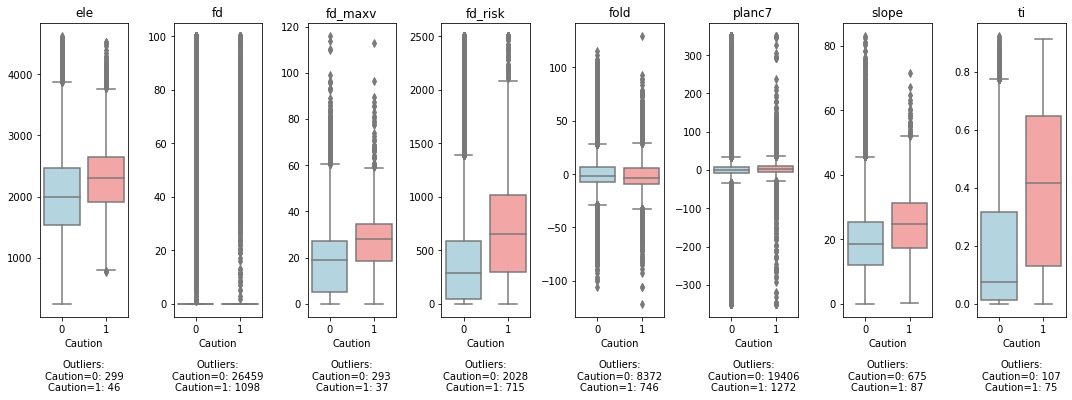

In [29]:
# Determine the number of columns in the grid
num_columns = len(variables_continuous)

# Calculate the number of rows needed
num_rows = (len(variables_continuous) + 1) // 2

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(15, 5*num_rows))

# Initialize a dictionary to store outlier counts
outlier_counts = {var: {'caution_0': 0, 'caution_1': 0} for var in variables_continuous}

# Plot boxplots for each continuous variable for caution = 1 (color red) and caution = 0 (color blue)
for i, var in enumerate(variables_continuous):
    row_index = i // num_columns
    col_index = i % num_columns
    
    # Plot boxplot
    sns.boxplot(y=df[var], x=df['caution'], ax=axes[row_index, col_index], palette={1:'#FF9999', 0:'#ADD8E6'})
    axes[row_index, col_index].set_title(var)
    axes[row_index, col_index].set_ylabel('')
    axes[row_index, col_index].set_xlabel('Caution')
    axes[row_index, col_index].set_xticklabels(['0', '1'])
    
    # Calculate outliers
    q1 = df[var].quantile(0.25)
    q3 = df[var].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    outliers_caution_0 = df[(df['caution'] == 0) & ((df[var] < lower_bound) | (df[var] > upper_bound))][var]
    outliers_caution_1 = df[(df['caution'] == 1) & ((df[var] < lower_bound) | (df[var] > upper_bound))][var]
    
    outlier_counts[var]['caution_0'] = len(outliers_caution_0)
    outlier_counts[var]['caution_1'] = len(outliers_caution_1)

    # Add outlier count to the subplot
    axes[row_index, col_index].text(0.5, -0.2, f"Outliers:\nCaution=0: {len(outliers_caution_0)}\nCaution=1: {len(outliers_caution_1)}",
                                    horizontalalignment='center', verticalalignment='center', transform=axes[row_index, col_index].transAxes)

# Remove empty subplots
for i in range(len(variables_continuous), num_columns * num_rows):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.savefig('../plots/boxplots_caution_with_counts.png')
plt.show()

### 4.1.2 Boxplots - categorized by 'caution' (filtered, i.e. adressed section-wise marking problem)

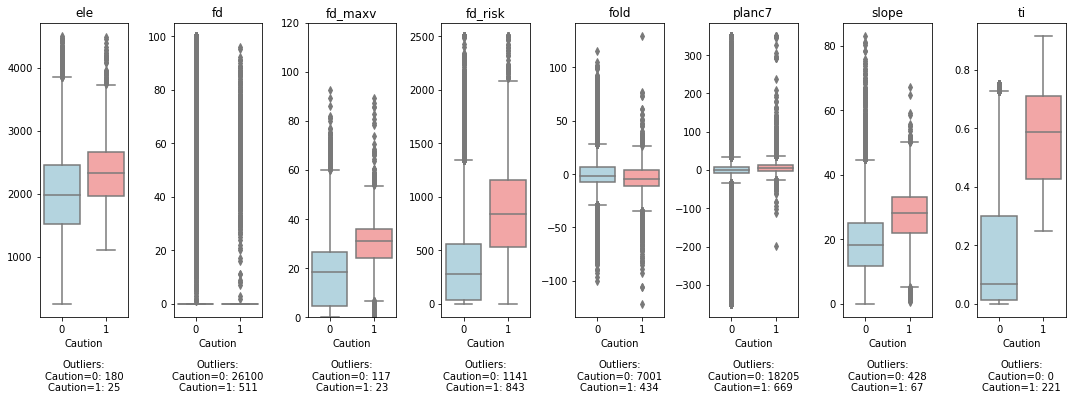

In [30]:
# Determine the number of columns in the grid
num_columns = len(variables_continuous)

# Calculate the number of rows needed
num_rows = (len(variables_continuous) + 1) // 2

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(15, 5*num_rows))

# Initialize a dictionary to store outlier counts
outlier_counts = {var: {'caution_0': 0, 'caution_1': 0} for var in variables_continuous}

# Plot boxplots for each continuous variable for caution = 1 (color red) and caution = 0 (color blue)
for i, var in enumerate(variables_continuous):
    row_index = i // num_columns
    col_index = i % num_columns
    
    # Plot boxplot
    sns.boxplot(y=df_c[var], x=df_c['caution'], ax=axes[row_index, col_index], palette={1:'#FF9999', 0:'#ADD8E6'})
    axes[row_index, col_index].set_title(var)
    axes[row_index, col_index].set_ylabel('')
    axes[row_index, col_index].set_xlabel('Caution')
    axes[row_index, col_index].set_xticklabels(['0', '1'])
    
    # Limit y-axis for fd_maxv
    if var == 'fd_maxv':
        axes[row_index, col_index].set_ylim(0, 120)
    
    # Calculate outliers
    q1 = df_c[var].quantile(0.25)
    q3 = df_c[var].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    outliers_caution_0 = df_c[(df_c['caution'] == 0) & ((df_c[var] < lower_bound) | (df_c[var] > upper_bound))][var]
    outliers_caution_1 = df_c[(df_c['caution'] == 1) & ((df_c[var] < lower_bound) | (df_c[var] > upper_bound))][var]
    
    outlier_counts[var]['caution_0'] = len(outliers_caution_0)
    outlier_counts[var]['caution_1'] = len(outliers_caution_1)

    # Add outlier count to the subplot
    axes[row_index, col_index].text(0.5, -0.2, f"Outliers:\nCaution=0: {len(outliers_caution_0)}\nCaution=1: {len(outliers_caution_1)}",
                                    horizontalalignment='center', verticalalignment='center', transform=axes[row_index, col_index].transAxes)

# Remove empty subplots
for i in range(len(variables_continuous), num_columns * num_rows):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.savefig('../plots/boxplots_caution_with_counts_FILTERED.png')
plt.show()

### 4.1.3 Boxplots - categorized by 'foot'

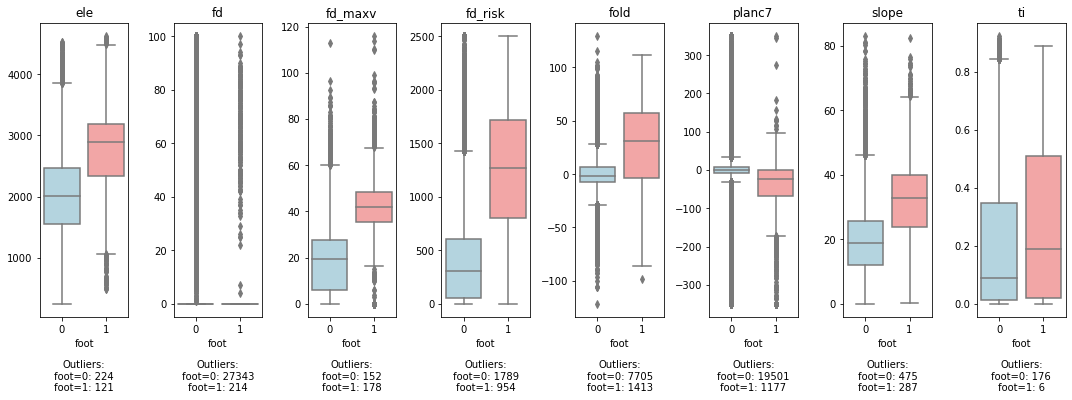

In [31]:
# Determine the number of columns in the grid
num_columns = len(variables_continuous)

# Calculate the number of rows needed
num_rows = (len(variables_continuous) + 1) // 2

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(15, 5*num_rows))

# Initialize a dictionary to store outlier counts
outlier_counts = {var: {'foot_0': 0, 'foot_1': 0} for var in variables_continuous}

# Plot boxplots for each continuous variable for foot = 1 (color red) and foot = 0 (color blue)
for i, var in enumerate(variables_continuous):
    row_index = i // num_columns
    col_index = i % num_columns
    
    # Plot boxplot
    sns.boxplot(y=df[var], x=df['foot'], ax=axes[row_index, col_index], palette={1:'#FF9999', 0:'#ADD8E6'})
    axes[row_index, col_index].set_title(var)
    axes[row_index, col_index].set_ylabel('')
    axes[row_index, col_index].set_xlabel('foot')
    axes[row_index, col_index].set_xticklabels(['0', '1'])
    
    # Calculate outliers
    q1 = df[var].quantile(0.25)
    q3 = df[var].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    outliers_foot_0 = df[(df['foot'] == 0) & ((df[var] < lower_bound) | (df[var] > upper_bound))][var]
    outliers_foot_1 = df[(df['foot'] == 1) & ((df[var] < lower_bound) | (df[var] > upper_bound))][var]
    
    outlier_counts[var]['foot_0'] = len(outliers_foot_0)
    outlier_counts[var]['foot_1'] = len(outliers_foot_1)

    # Add outlier count to the subplot
    axes[row_index, col_index].text(0.5, -0.2, f"Outliers:\nfoot=0: {len(outliers_foot_0)}\nfoot=1: {len(outliers_foot_1)}",
                                    horizontalalignment='center', verticalalignment='center', transform=axes[row_index, col_index].transAxes)

# Remove empty subplots
for i in range(len(variables_continuous), num_columns * num_rows):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.savefig('../plots/boxplots_foot_with_counts.png')
plt.show()

# <span style="color:#FF9999">**5 Correlation analysis**</span>

## **5.1 Correlation matrices**

### 5.1.1 Correlation analysis for continuous variables (Pearson's correlation)

In [32]:
# Drop unnecessary variables
df.drop(['lake', 'country', 'id', 'ski', 'snowshoe'], axis=1, inplace=True)

# Lists of variable types
variables_continuous = ['ele', 'fd', 'fd_maxv', 'fd_risk', 'fold', 'planc7', 'slope', 'ti']

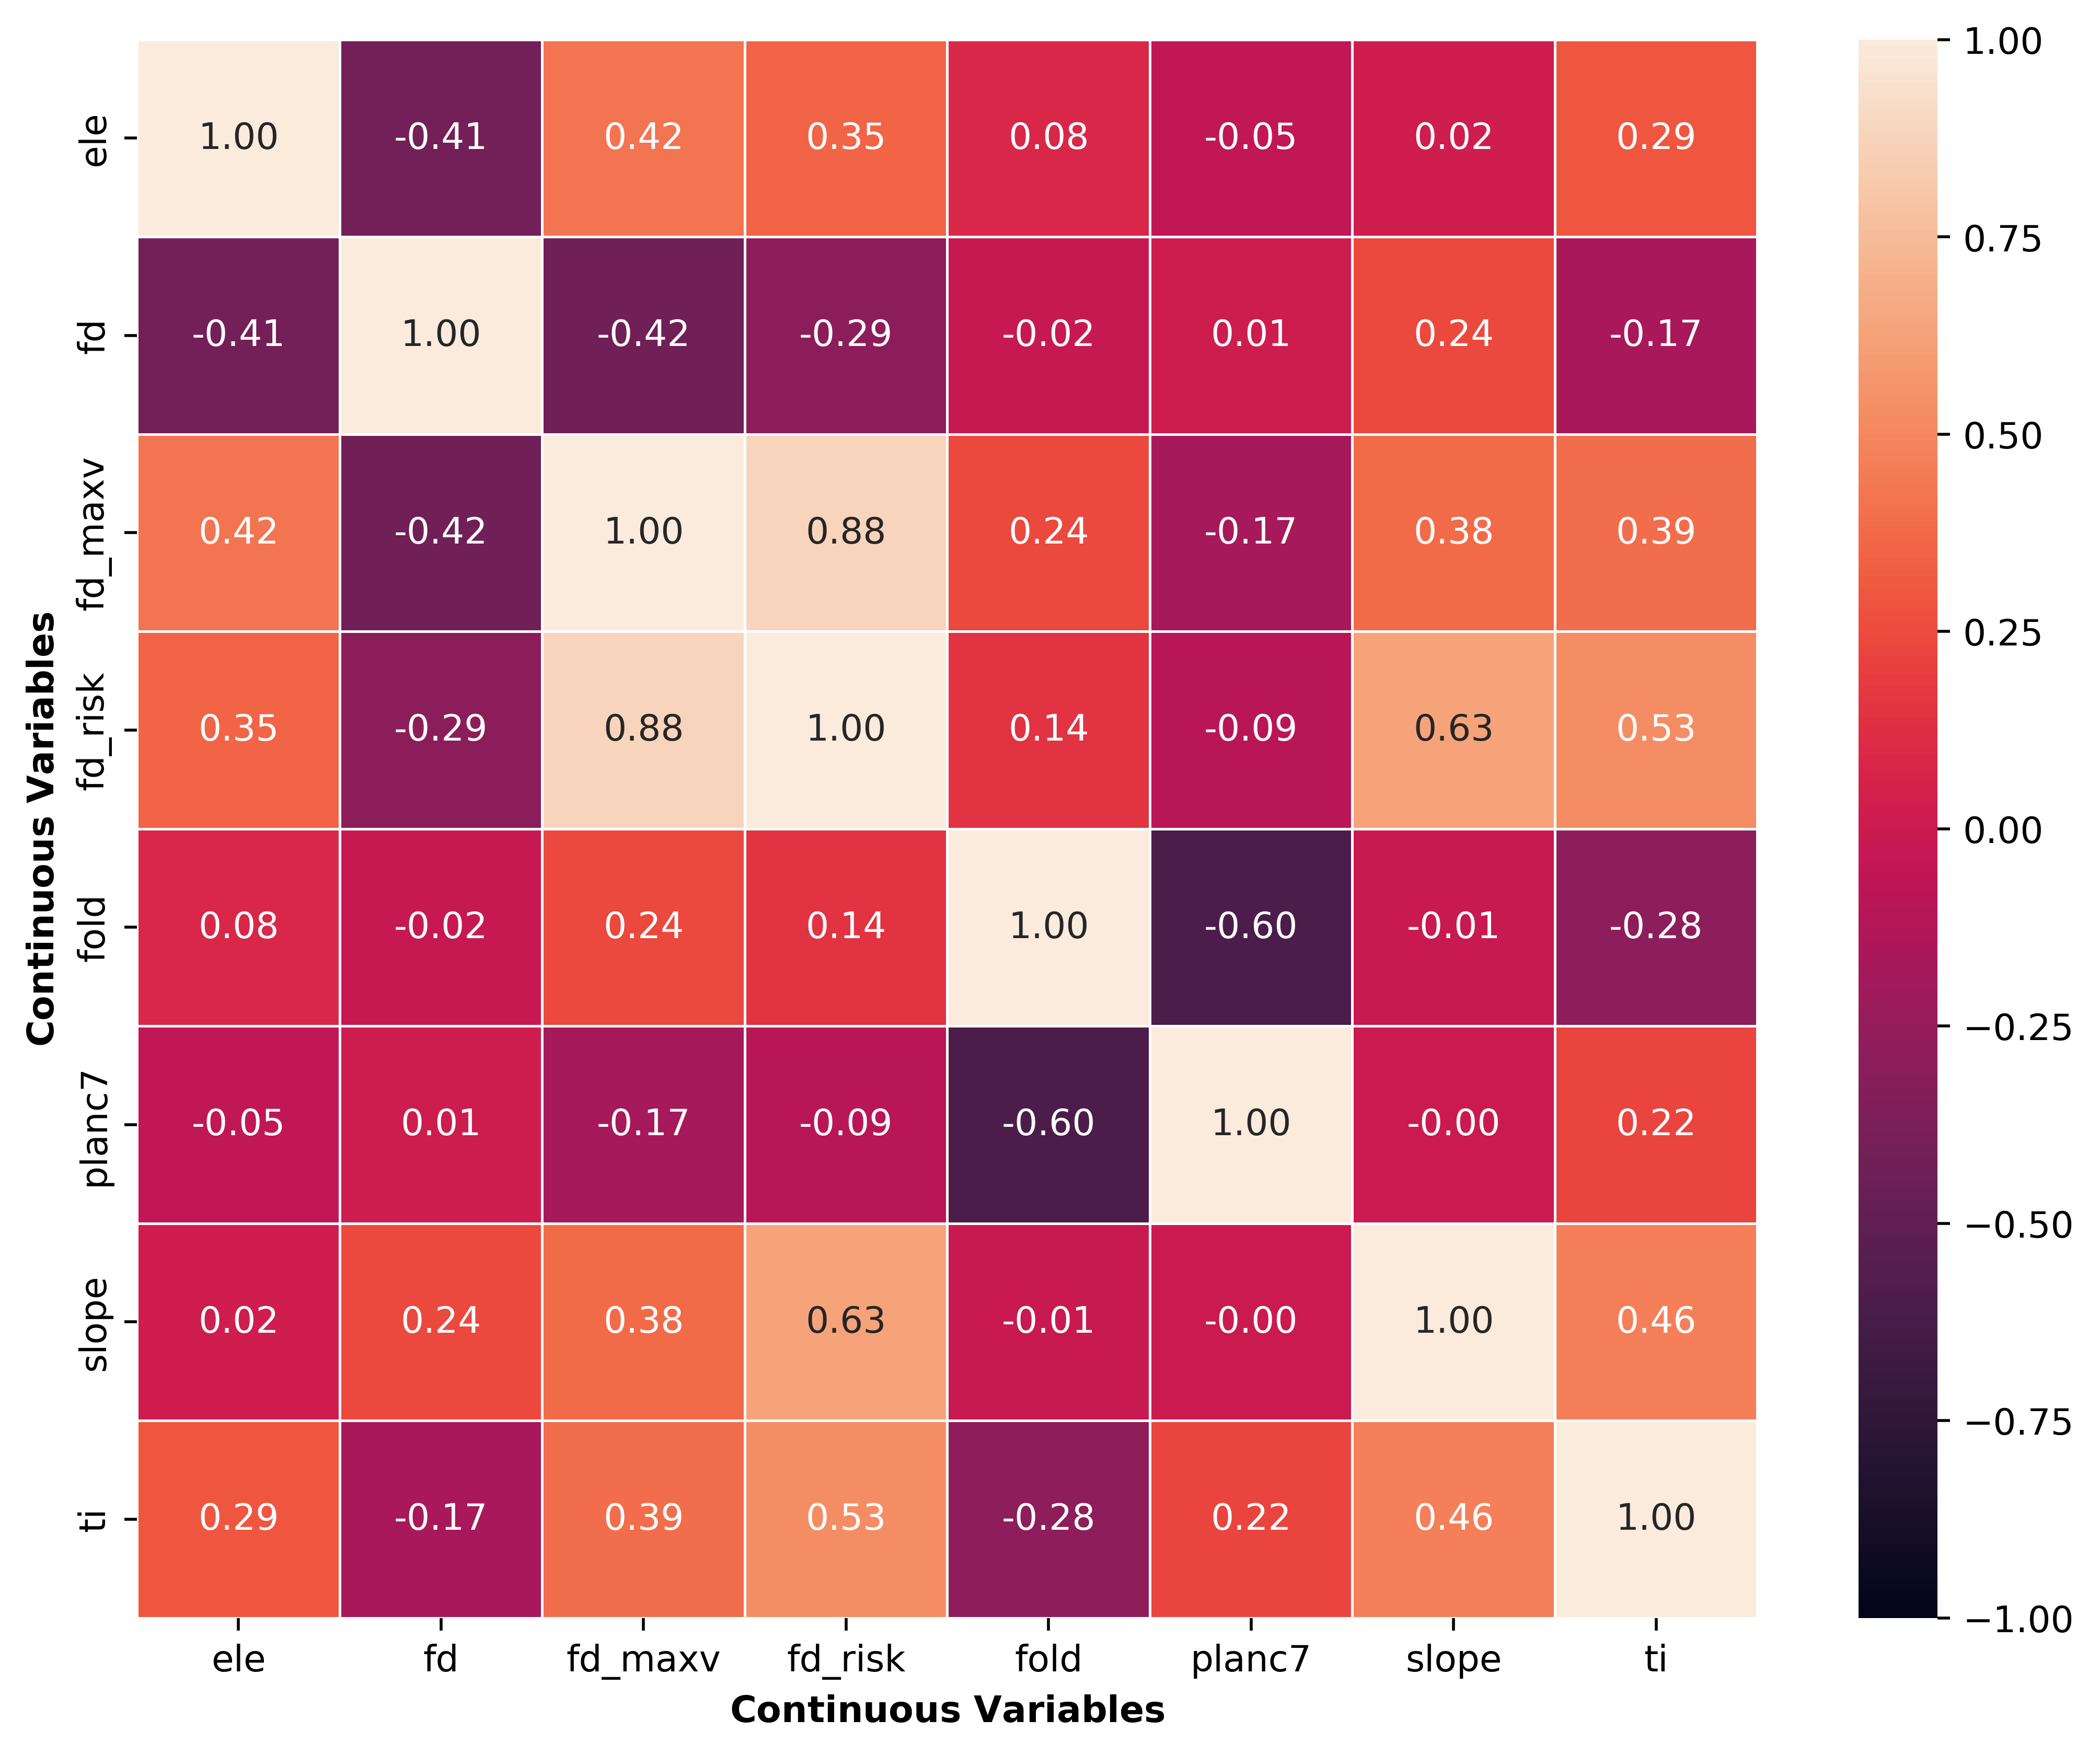

In [33]:
# Selecting the continuous variables from the DataFrame
df_continuous = df[variables_continuous]

# Correlation matrix
correlation_matrix = df_continuous.corr()

# Create heatmap
plt.figure(figsize=(10, 8), dpi=500)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidth=.5, vmin=-1, vmax=1)
plt.xlabel(r"$\bf{Continuous\ Variables}$")
plt.ylabel(r"$\bf{Continuous\ Variables}$")
plt.savefig('../plots/pearson_correlation.png')

# Show plot
plt.show()

### 5.1.2 Correlation analysis for continuous and binary variables (Point biserial correlation)

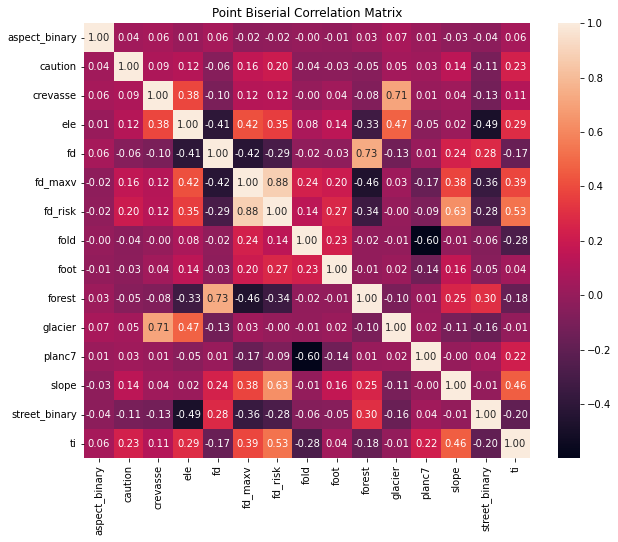

In [34]:
# Calculate point biserial correlation coefficients
correlation_matrix = df.corr(method=lambda x, y: pointbiserialr(x, y)[0])

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Point Biserial Correlation Matrix')
plt.savefig('../plots/point_biserial.png')
plt.show()

### 5.1.3 Correlation analysis (filtered) for continuous and binary variables (Point biserial correlation)

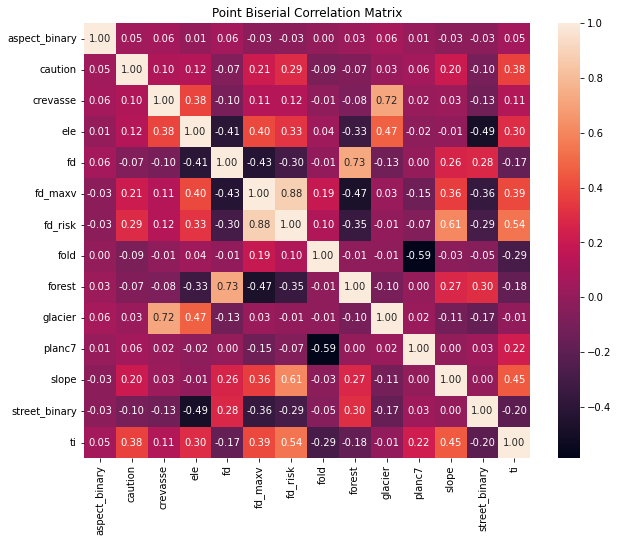

In [35]:
# Calculate point biserial correlation coefficients
correlation_matrix = df_c.corr(method=lambda x, y: pointbiserialr(x, y)[0])

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Point Biserial Correlation Matrix')
plt.savefig('../plots/point_biserial_FILTERED.png')
plt.show()

## **5.2 Visual correlation analysis**

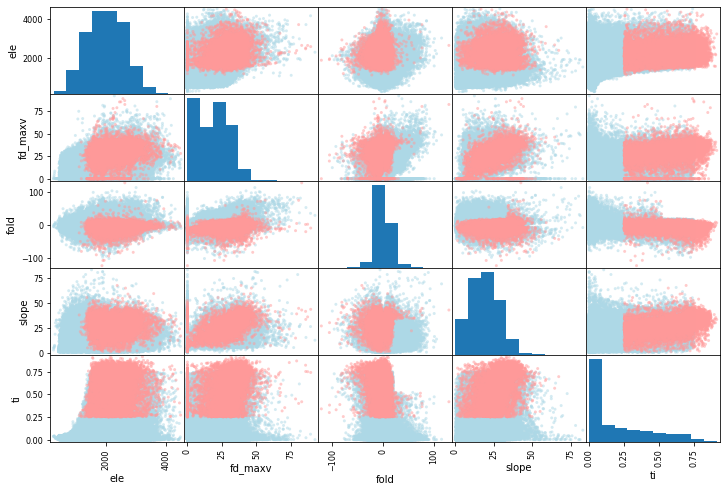

In [36]:
# Remove crevasse
variables_continuous = ['ele', 'fd_maxv', 'fold', 'slope', 'ti']

# Combine the data frames for both categories
df_combined = pd.concat([df_c[df_c['caution'] == 0], df_c[df_c['caution'] == 1]])

# Add a new column to distinguish between caution categories
df_combined['caution_category'] = df_combined['caution'].map({0: 'Category 0', 1: 'Category 1'})

# Plot scatter matrix with color based on caution category
scatter_matrix(df_combined[variables_continuous], figsize=(12, 8), c=df_combined['caution'].map({0: '#ADD8E6', 1: '#FF9999'}))
plt.savefig('../plots/visual_correlation_caution_FILTERED.png')
plt.show()

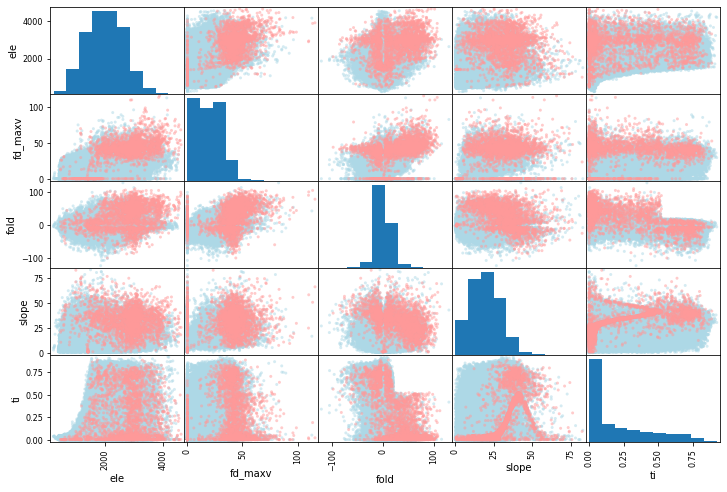

In [37]:
# Combine the data frames for both categories
df_combined = pd.concat([df[df['foot'] == 0], df[df['foot'] == 1]])

# Add a new column to distinguish between foot categories
df_combined['foot_category'] = df_combined['foot'].map({0: 'Category 0', 1: 'Category 1'})

# Plot scatter matrix with color based on foot category
scatter_matrix(df_combined[variables_continuous], figsize=(12, 8), c=df_combined['foot'].map({0: '#ADD8E6', 1: '#FF9999'}))
plt.savefig('../plots/visual_correlation_foot.png')
plt.show()